In [47]:
# Initial Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [48]:
# Import the data

# Define the 'get_data' function
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData["Close"]
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

# Identify the Cryptos
stockList = ["ADA", "SOL", "BNB", "XRP", "ETH", "BTC"]
stocks = [stock + "-USD" for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365)

In [49]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

In [50]:
print(meanReturns)

Symbols
ADA-USD   -0.003056
SOL-USD   -0.003431
BNB-USD   -0.000745
XRP-USD   -0.001447
ETH-USD   -0.001776
BTC-USD   -0.002413
dtype: float64


In [51]:
weights = 0.16, 0.16, 0.16, 0.16, 0.16, 0.16
weights /= np.sum(weights)

In [52]:
# Monte Carlo Method
# Number of simulations
mc_sims = 500
T = 100 #timeframe in days

meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0)

initialPortfolio = 10000

for m in range (0, mc_sims):
    # MC loops
    Z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1)*initialPortfolio

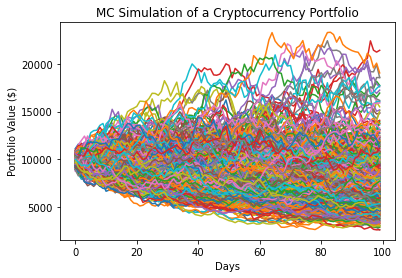

In [53]:
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC Simulation of a Cryptocurrency Portfolio")
plt.show()